<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Quantum_Dungeon_Generation_Test_with_QFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Packages setup

In [1]:
!pip install qiskit --quiet && pip install pylatexenc --quiet && pip install qiskit-aer --quiet

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, execute, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization.state_visualization import array_to_latex
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
from qiskit.circuit.library import QFT

Creating the circuit that represents all the possible dungeons layout

In [3]:
# Utils to normalize a vector

def normalize_to_unit_length(vector):
    norm = np.linalg.norm(vector)
    if norm == 0:
        return vector
    normalized_vector = vector / norm
    return normalized_vector

In [4]:
# Baked state vector

global_state_vector = [0.0,        0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.0,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.0,        0.06772855,
 0.0,        0.0,        0.0,        0.06772855, 0.06772855, 0.0,
 0.06772855, 0.06772855, 0.0,        0.0,        0.06772855, 0.06772855,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.0,        0.0,
 0.06772855, 0.06772855, 0.06772855, 0.0,        0.0,        0.0,
 0.06772855, 0.0,        0.06772855, 0.06772855, 0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.06772855,
 0.06772855, 0.0,        0.06772855, 0.06772855, 0.06772855, 0.0,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.06772855, 0.06772855, 0.0,        0.06772855, 0.0,        0.0,
 0.0,        0.06772855, 0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.06772855, 0.06772855,
 0.06772855, 0.06772855, 0.0,        0.0,        0.06772855, 0.06772855,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.06772855, 0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855,
 0.06772855, 0.06772855, 0.06772855, 0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.06772855, 0.0,        0.06772855, 0.06772855, 0.0,        0.0,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855,
 0.0,        0.0,        0.06772855, 0.06772855, 0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.06772855, 0.0,        0.06772855, 0.06772855,
 0.06772855, 0.0,        0.06772855, 0.06772855, 0.06772855, 0.06772855,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855,
 0.06772855, 0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.06772855, 0.06772855, 0.0,        0.06772855,
 0.0,        0.0,        0.0,        0.06772855, 0.06772855, 0.0,
 0.06772855, 0.06772855, 0.0,        0.0,        0.06772855, 0.06772855,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.0,        0.0,
 0.06772855, 0.06772855, 0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.06772855,
 0.06772855, 0.0,        0.06772855, 0.06772855, 0.06772855, 0.0,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.06772855, 0.0,        0.0,        0.0,        0.06772855, 0.0,
 0.06772855, 0.06772855, 0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.06772855, 0.06772855, 0.0,
 0.06772855, 0.06772855, 0.06772855, 0.0,        0.06772855, 0.06772855,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855,
 0.06772855, 0.06772855, 0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.06772855, 0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.06772855, 0.06772855,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855,
 0.06772855, 0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.06772855, 0.0,
 0.06772855, 0.06772855, 0.0,        0.0,        0.06772855, 0.06772855,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.0,        0.0,
 0.06772855, 0.06772855, 0.06772855, 0.0,        0.0,        0.0,
 0.06772855, 0.0,        0.06772855, 0.06772855, 0.0,        0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.06772855,
 0.06772855, 0.0,        0.06772855, 0.06772855, 0.06772855, 0.0,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.0,
 0.0,        0.0,        0.0,        0.0,        0.0,        0.0,
 0.06772855, 0.06772855, 0.0,        0.06772855, 0.0,        0.0,
 0.0,        0.06772855, 0.06772855, 0.0,        0.06772855, 0.06772855,
 0.0,        0.0,        0.06772855, 0.06772855, 0.06772855, 0.06772855,
 0.06772855, 0.06772855, 0.0,        0.0,        0.06772855, 0.06772855,
 0.06772855, 0.0,        0.0,        0.0,        0.06772855, 0.0,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.0,        0.06772855,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.0,
 0.06772855, 0.06772855, 0.06772855, 0.0,        0.06772855, 0.06772855,
 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855, 0.06772855,
 0.06772855, 0.06772855 ]

global_state_vector = normalize_to_unit_length(global_state_vector)

In [5]:
# Creating a circuit to initialize from |0.....0> to the given state vector
qc = QuantumCircuit(9)
qc.initialize(global_state_vector, range(9))
qc = transpile(qc,
               basis_gates=["u3", "u2", "u1", "cx", "id", "u0", "u", "p", "x", "y", "z", "h", "s", "sdg", "t", "tdg",
                            "rx", "ry", "rz", "sx", "sxdg", "cz", "cy", "swap", "ch", "ccx", "cswap", "crx", "cry",
                            "crz", "cu1", "cp", "cu3", "csx", "cu", "rxx", "rzz", "rccx", "rc3x", "c3x", "c3sqrtx",
                            "c4x"])

In [6]:
# Remove the initial reset operations
reset_index = [index for index, instr in enumerate(qc.data) if instr[0].name == 'reset']

new_qc = QuantumCircuit(qc.num_qubits)
for index, instr in enumerate(qc.data):
    if index not in reset_index:
        new_qc.append(instr[0], instr[1])

In [7]:
# Creating the state_prep and inverse to be used in Grover
stat_prep = new_qc.to_instruction()
inv_stat_prep = new_qc.inverse().to_instruction()

In [8]:
# Adding measurements
qc.measure_all()

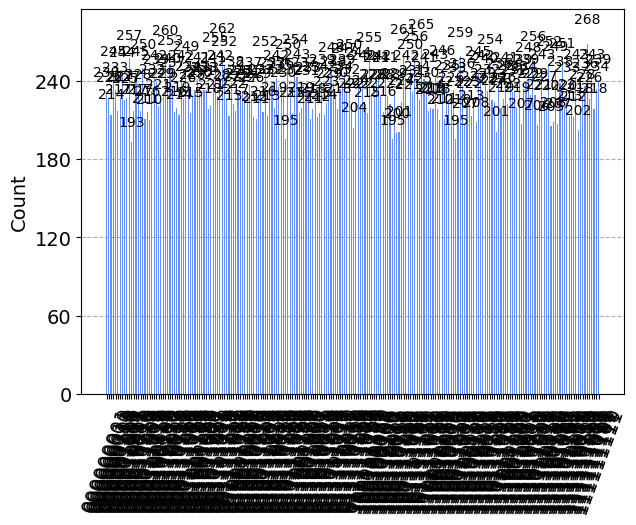

In [9]:
# Testing the results - uniform probability
quantum_simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=quantum_simulator, shots=50000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

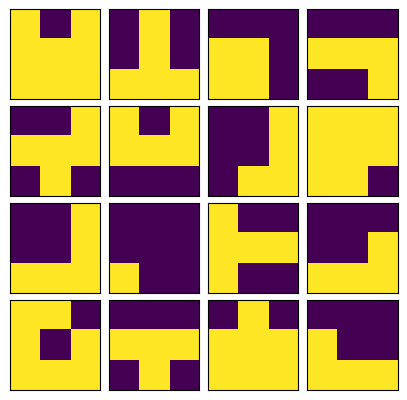

In [10]:
# Testing the results - printing some dungeon
keys = list(counts.keys())

fig, ax = plt.subplots(4, 4, figsize=(5, 5), subplot_kw={"xticks": [], "yticks": []})
for i in range(16):
  ax[i // 4, i % 4].imshow(
      np.array([int(x) for x in keys[i]]).reshape(3, 3),
      aspect="equal",
  )
plt.subplots_adjust(wspace=0.1, hspace=0.025)

## Grover
Now I want to filter the dungeons with grover

In [11]:
# Diffusion from the Qiskit textbook

def cnz(qc, num_control, node, anc):
    """Construct a multi-controlled Z gate

    Args:
    num_control :  number of control qubits of cnz gate
    node :             node qubits
    anc :               ancillaly qubits
    """
    if num_control > 2:
        qc.ccx(node[0], node[1], anc[0])
        for i in range(num_control - 2):
            qc.ccx(node[i + 2], anc[i], anc[i + 1])
        qc.cz(anc[num_control - 2], node[num_control])
        for i in range(num_control - 2)[::-1]:
            qc.ccx(node[i + 2], anc[i], anc[i + 1])
        qc.ccx(node[0], node[1], anc[0])
    if num_control == 2:
        qc.h(node[2])
        qc.ccx(node[0], node[1], node[2])
        qc.h(node[2])
    if num_control == 1:
        qc.cz(node[0], node[1])

In [12]:
from qiskit.circuit.library.standard_gates.multi_control_rotation_gates import MCXGate
# Registers
graph = QuantumRegister(9, 'graph')
oracle = QuantumRegister(1, 'oracle')
const_anc = QuantumRegister(2, 'c_anc')
counts = QuantumRegister(3, 'count')
anc = QuantumRegister(7, 'anc_diff')
c = ClassicalRegister(9, 'c')

qc = QuantumCircuit(graph, const_anc, oracle, counts, anc, c)

qc.barrier(label="State preparation")
qc.append(stat_prep, graph)

qc.barrier(label="Oracle preparation")
qc.x(9)
qc.h(9)

num_iterations = 10

for i in range(num_iterations):

  # I want all the dungeons with the first square checked
  # (using 8 because qiskit measures in the opposite direction)
  qc.barrier(label="Oracle")
  qc.ccx(graph[7], graph[8], const_anc[0])
  qc.barrier()
  # Now I want to count how many rooms there are in the 3 count qubits

  qc.h(counts)
  qc.barrier()
  for qubit in graph:
    qc.crz(np.pi/4, qubit, counts[0])
    qc.crz(np.pi/2, qubit, counts[1])
    qc.crz(np.pi, qubit, counts[2])
    qc.barrier()

  qft = QFT(3, do_swaps=True, inverse=True)
  qc.append(qft.to_instruction(), counts)

  mcx = MCXGate(3, "count", "010")

  qc.append(mcx, qargs=[counts[0], counts[1], counts[2], const_anc[1]])

  qc.barrier()

  # I now attach the constraint ancillas to the oracle register
  qc.ccx(const_anc[0], const_anc[1], oracle[0])

  qc.barrier()

  qc.append(mcx, qargs=[counts[0], counts[1], counts[2], const_anc[1]])

  qc.append(qft.inverse().to_instruction(), counts)

  # Then I reset the oracle
  for qubit in graph:
    qc.crz(-np.pi, qubit, counts[2])
    qc.crz(-np.pi/2, qubit, counts[1])
    qc.crz(-np.pi/4, qubit, counts[0])
    qc.barrier()

  qc.h(counts)
  qc.barrier()

  qc.ccx(graph[7], graph[8], const_anc[0])

  qc.barrier(label="Diffusion")

  # inv state preparation + x
  qc.append(inv_stat_prep, range(9))
  qc.x(range(9))

  qc.barrier()

  # Multi-controlled Z
  cnz(qc, 8, graph[::-1], anc)

  qc.barrier()

  # x + state preparation
  qc.x(range(9))
  qc.append(stat_prep, range(9))

# Measurement
qc.measure(graph, c)

qc.draw("text")

State preparation ┌───────────────┐ Oracle preparation           »
   graph_0: ─────────░─────────┤0              ├─────────░────────────────────»
                     ░         │               │         ░                    »
   graph_1: ─────────░─────────┤1              ├─────────░────────────────────»
                     ░         │               │         ░                    »
   graph_2: ─────────░─────────┤2              ├─────────░────────────────────»
                     ░         │               │         ░                    »
   graph_3: ─────────░─────────┤3              ├─────────░────────────────────»
                     ░         │               │         ░                    »
   graph_4: ─────────░─────────┤4 circuit-3204 ├─────────░────────────────────»
                     ░         │               │         ░                    »
   graph_5: ─────────░─────────┤5              ├─────────░────────────────────»
                     ░         │               │         ░                    »
   graph_6: ─────────░─────────┤6              ├─────────░────────────────────»
                     ░         │               │         ░                    »
   graph_7: ─────────░─────────┤7              ├─────────░────────────────────»
                     ░         │               │         ░                    »
   graph_8: ─────────░─────────┤8              ├─────────░────────────────────»
                     ░         └───────────────┘         ░          ┌───┐┌───┐»
   c_anc_0: ─────────░───────────────────────────────────░──────────┤ X ├┤ H ├»
                     ░                                   ░          └───┘└───┘»
   c_anc_1: ─────────░───────────────────────────────────░────────────────────»
                     ░                                   ░                    »
    oracle: ─────────░───────────────────────────────────░────────────────────»
                     ░                                   ░                    »
   count_0: ─────────░───────────────────────────────────░────────────────────»
                     ░                                   ░                    »
   count_1: ─────────░───────────────────────────────────░────────────────────»
                     ░                                   ░                    »
   count_2: ─────────░───────────────────────────────────░────────────────────»
                     ░                                   ░                    »
anc_diff_0: ─────────░───────────────────────────────────░────────────────────»
                     ░                                   ░                    »
anc_diff_1: ─────────░───────────────────────────────────░────────────────────»
                     ░                                   ░                    »
anc_diff_2: ─────────░───────────────────────────────────░────────────────────»
                     ░                                   ░                    »
anc_diff_3: ─────────░───────────────────────────────────░────────────────────»
                     ░                                   ░                    »
anc_diff_4: ─────────░───────────────────────────────────░────────────────────»
                     ░                                   ░                    »
anc_diff_5: ─────────░───────────────────────────────────░────────────────────»
                     ░                                   ░                    »
anc_diff_6: ─────────░───────────────────────────────────░────────────────────»
                     ░                                   ░                    »
       c: 9/══════════════════════════════════════════════════════════════════»
                                                                              »
«             Oracle       ░       ░                                 ░ »
«   graph_0: ───░──────────░───────░──────■──────────■─────────■─────░─»
«               ░          ░       ░      │          │         │     ░ »
«   graph_1: ───░──────────░──────

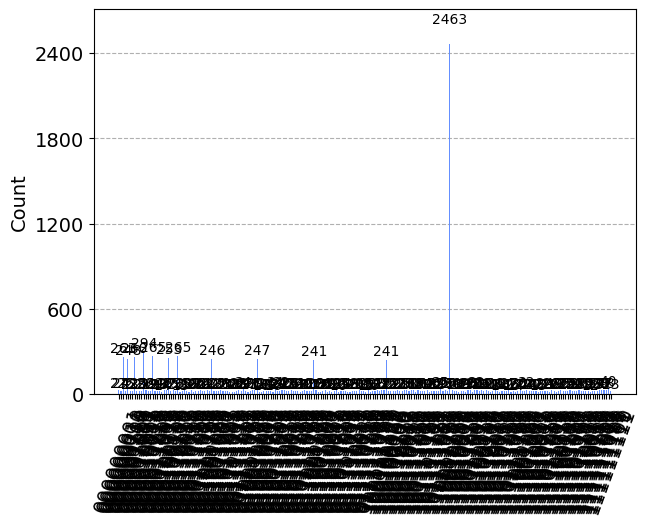

In [13]:
# Testing the results - probability
quantum_simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=quantum_simulator, shots=10000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

IndexError: ignored

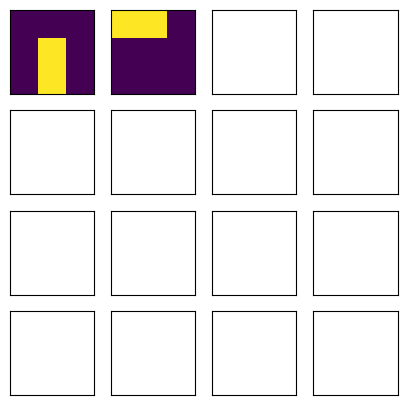

In [14]:
# Testing the results - printing some dungeon with high count
keys = list([key for key in counts.keys() if counts[key] > 270])

fig, ax = plt.subplots(4, 4, figsize=(5, 5), subplot_kw={"xticks": [], "yticks": []})
for i in range(16):
  ax[i // 4, i % 4].imshow(
      np.array([int(x) for x in keys[i]]).reshape(3, 3),
      aspect="equal",
  )
plt.subplots_adjust(wspace=0.1, hspace=0.025)

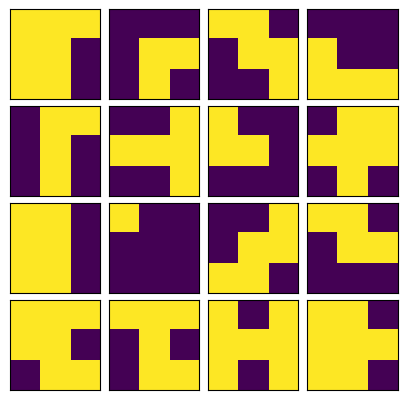

In [15]:
# Testing the results - printing some WRONG
keys = list([key for key in counts.keys() if counts[key] < 200])

fig, ax = plt.subplots(4, 4, figsize=(5, 5), subplot_kw={"xticks": [], "yticks": []})
for i in range(16):
  ax[i // 4, i % 4].imshow(
      np.array([int(x) for x in keys[i]]).reshape(3, 3),
      aspect="equal",
  )
plt.subplots_adjust(wspace=0.1, hspace=0.025)